In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import csv
import os
import seaborn as sns
from scipy import stats as st
from numpy import linalg as LA

In [3]:
PATH2 = 'TimeSeries_K2.csv'
PATH3 = 'TimeSeries_K3.csv'
PATH4 = 'TimeSeries_K4.csv'

In [4]:
def loadset(PATH):
    #==========================================#
    # A function to load the TimeSeries data and return it as numpy matrix
    # input:
    # PATH: the path to import the data
    # output:
    # k: a numpy array for the data
    #=========================================#
    R = pd.read_csv(PATH, low_memory = False)
    k = pd.DataFrame(R)
    k = k.values
    k = np.mat(k)
    return k

In [5]:
def pca(matrix,k):
    #==========================================#
    # A function to process pca and return the eigenvalues and the dimension-reduced 
    # variance matrix
    # input:
    # matrix: the data needed to process pca, here is the TimeSeries data
    # k: the dimension which the data is reduced to, it should be 2
    # output:
    # eigvalues: the eigenvalues for the covariance matrix
    # new_mat: the dimension-reduced variance matrix
    #=========================================#
    meanvals = np.mean(matrix, axis=0)
    data_adjust = matrix - meanvals
    p,n = np.shape(data_adjust)
    covmatrix = np.dot(data_adjust.T, data_adjust)/(p-1)
    eigvalues, eigvectors = LA.eig(np.mat(covmatrix))
    eigorder = np.argsort(eigvalues)
    eigorder = eigorder[: -k - 1: -1]
    eigvec = eigvectors[:, eigorder]
    new_mat = np.dot(data_adjust,eigvec)
    return eigvalues,new_mat

the eigenvalues is 
[76.19183049935039, 4.88937486206238, 4.765017321467426, 4.669044235652727, 4.523428715674892, 4.500060733416435, 4.431972158746104, 4.317394466388408, 4.184926487192476, 4.009555554215269, 3.8489035443356867, 3.819102612865778, 3.741082534486801, 3.5406103730403204, 3.449409379243905, 3.3509669011761325, 3.3401975909447144, 3.2224593596699598, 3.10798506621697, 2.985581114462761]


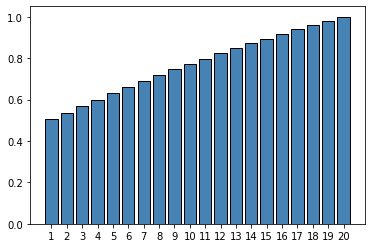

In [6]:
# TimeSeries2
# i
origmat = loadset(PATH2)
eigenvalues, newmat = pca(origmat, 2)
ei = sorted(eigenvalues,reverse = True)
print('the eigenvalues is ')
print(ei)
frac = np.cumsum(ei)/sum(ei)
k = list(range(1,21))
plt.bar(k,frac, color = 'steelblue', edgecolor = 'black')
plt.xticks(k)
plt.show()

Based on the plot, we can see that for each single eigenvalues in [2,20], it provides really small explaination for the variance. Only the first eigenvalue provides the significant information. So k = 1 might be a good choice.

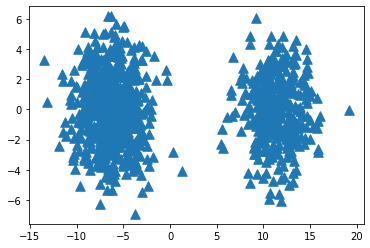

In [7]:
#ii
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(newmat[:,0].flatten().A[0],newmat[:,1].flatten().A[0],marker='^',s=90)
plt.show()

The data points separate into the two of clusters, which is appropriate.

In [8]:
# iii
a = newmat[:,0].flatten()
b = newmat[:,1].flatten()
cov_new = np.cov(a,b)
k0 = (newmat[:,0].flatten().A[0])**2
k1 = (newmat[:,1].flatten().A[0])**2

print('the covariance of c1 and c2 is ' + str(cov_new[0,1])) #?
print('the variance of c1 is ' + str(np.mean(k0)))
print('the variance of c2 is ' + str(np.mean(k1)))
print('the frist two eigenvalues are ' + str(ei[0]) + ' and ' + str(ei[1]))

the covariance of c1 and c2 is 2.8450159589994e-16
the variance of c1 is 76.11563866885103
the variance of c2 is 4.884485487200318
the frist two eigenvalues are 76.19183049935039 and 4.88937486206238


the eigenvalues is 
[66.63511259572641, 26.777183455697706, 4.89213362211644, 4.7882761735797725, 4.596775818959551, 4.503308135646108, 4.452894707917093, 4.2538605477071405, 4.181087072040128, 4.046562997259985, 3.9480569529832223, 3.9276037446737195, 3.9210093014214373, 3.80134188419069, 3.711373376451217, 3.5723244273020884, 3.505226765275382, 3.394812658521575, 3.0292641898863373, 3.0086166191333197]


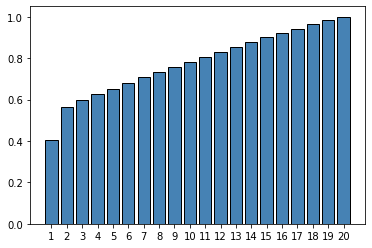

In [9]:
# TimeSeries3
# i
origmat = loadset(PATH3)
eigenvalues, newmat = pca(origmat, 2)
ei = sorted(eigenvalues,reverse = True)
print('the eigenvalues is ')
print(ei)
frac = np.cumsum(ei)/sum(ei)
k = list(range(1,21))
plt.bar(k,frac, color = 'steelblue', edgecolor = 'black')
plt.xticks(k)
plt.show()

Based on the plot, we can see c1 and c2 both provide a signifiant amount of information for the variance. In the rest eigenvalues, each of them provdes a small explaination to the variance. Therefore, k = 2 is a good choice.

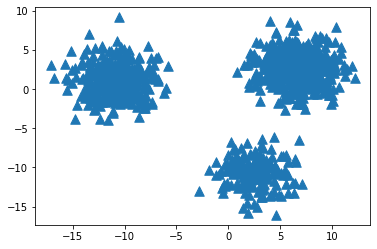

In [10]:
#ii
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(newmat[:,0].flatten().A[0],newmat[:,1].flatten().A[0],marker='^',s=90)
plt.show()

The data points separate into the three of clusters, which is appropriate.

In [11]:
# iii
a = newmat[:,0].flatten()
b = newmat[:,1].flatten()
cov_new = np.cov(a,b)
k0 = (newmat[:,0].flatten().A[0])**2
k1 = (newmat[:,1].flatten().A[0])**2

print('the covariance of c1 and c2 is ' + str(cov_new[0,1])) #?
print('the variance of c1 is ' + str(np.mean(k0)))
print('the variance of c2 is ' + str(np.mean(k1)))
print('the frist two eigenvalues are ' + str(ei[0]) + ' and ' + str(ei[1]))

the covariance of c1 and c2 is -1.3087073411397242e-15
the variance of c1 is 66.56847748313065
the variance of c2 is 26.75040627224199
the frist two eigenvalues are 66.63511259572641 and 26.777183455697706


the eigenvalues is 
[54.50773556910386, 35.89066796097669, 16.544047813014995, 4.980276567684085, 4.825599634646665, 4.742818165576888, 4.638224461117178, 4.456600158744122, 4.299212290772617, 4.209854839109642, 4.023323866517447, 3.936625519280815, 3.9085863627025508, 3.7622755609032357, 3.7240843728400064, 3.607533511914653, 3.4690105775345716, 3.4184690773851734, 3.2234333803889803, 3.058030889503025]


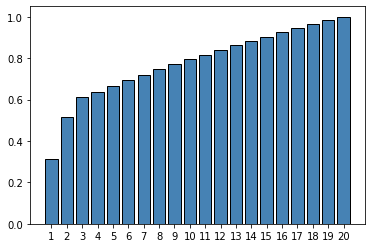

In [12]:
# TimeSeries4
# i
origmat = loadset(PATH4)
eigenvalues, newmat = pca(origmat, 2)
ei = sorted(eigenvalues,reverse = True)
print('the eigenvalues is ')
print(ei)
frac = np.cumsum(ei)/sum(ei)
k = list(range(1,21))
plt.bar(k,frac, color = 'steelblue', edgecolor = 'black')
plt.xticks(k)
plt.show()

Based on the graph, we can see c1, c2, c3 provide a large amount of information for variance. So k should be 3.

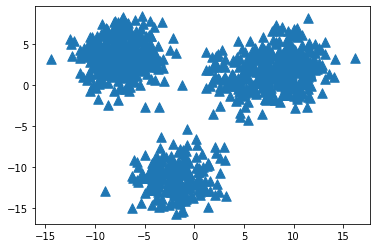

In [13]:
#ii
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(newmat[:,0].flatten().A[0],newmat[:,1].flatten().A[0],marker='^',s=90)
plt.show()

For this one, it did not separate to four clusers, but we have four base time series. I blieve it is because we only plot it in a 2-dimension plot, but it needs k = 3 to express well.

In [14]:
# iii
a = newmat[:,0].flatten()
b = newmat[:,1].flatten()
cov_new = np.cov(a,b)
k0 = (newmat[:,0].flatten().A[0])**2
k1 = (newmat[:,1].flatten().A[0])**2

print('the covariance of c1 and c2 is ' + str(cov_new[0,1])) #?
print('the variance of c1 is ' + str(np.mean(k0)))
print('the variance of c2 is ' + str(np.mean(k1)))
print('the frist two eigenvalues are ' + str(ei[0]) + ' and ' + str(ei[1]))

the covariance of c1 and c2 is 9.445452983878009e-15
the variance of c1 is 54.453227833534775
the variance of c2 is 35.85477729301572
the frist two eigenvalues are 54.50773556910386 and 35.89066796097669
